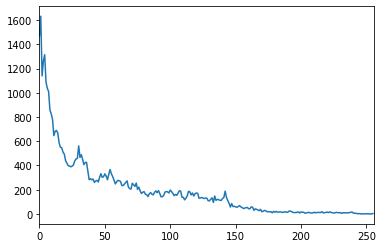

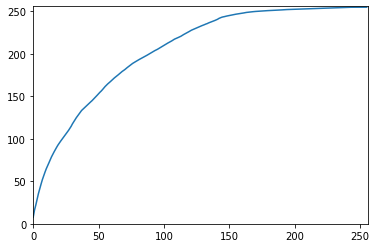

256


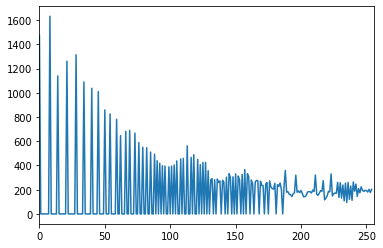

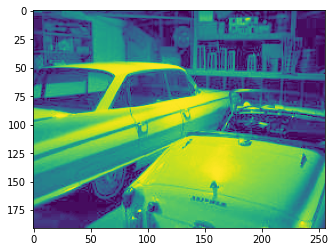

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy.stats import norm

class ImageProcessing:
    def __init__(self, path):
        self.im, self.rgb = self.get_image_data(path)
        self.width, self.height = self.im.size
        # self.show(self.rgb, 'normal', 255)

    def get_image_data(self, path):
        im = Image.open(path)
        rgb = np.array(im)
        return im, rgb
    
    def show(self, data, type, scale):
        pilImg = Image.fromarray(np.uint8(data))
        pilImg.show()
        # pilImg.save('./{0}/{0}_{1}.jpg'.format(type, scale))
        return pilImg
    
    def get_monochrome_data(self):
        monochrome_data = 0.299 * self.rgb[:, :, 0] + 0.587 * self.rgb[:, :, 1] + 0.114 * self.rgb[:, :, 2]
        array = []
        for i in range(len(monochrome_data)):
            array += [*monochrome_data[i]]
        array = np.array(array)
        return array
    
    def get_contrast_data(self):
        array = self.get_monochrome_data()
        plt.hist(array, range(0, 255))
        plt.show()
        max_value, min_value = max(array), min(array)
        contrast_array = (array - min_value) / (max_value - min_value) * 255
        plt.hist(contrast_array, range(0, 255))
        plt.show()
        cv2.imwrite('./image_3_cont.jpg', contrast_array.reshape(self.height, self.width))
        return monochrome_data
    
    def get_cdf_data(self):
        array = self.get_monochrome_data()

        img = np.array(Image.open('./image_2.jpg').convert('L'))
        hist, bins = np.histogram(img.flatten(), bins=256)
        # 0〜256までplot
        plt.plot(hist)
        plt.xlim(0, 256)
        plt.show()

        # 累積分布を取る
        cdf = hist.cumsum()
        # 正規化（0〜255の分布にする）
        cdf = 255 * cdf / cdf[-1]

        # とりあえずここまででplot
        plt.plot(cdf)
        plt.xlim(0, 256)
        plt.ylim(0, 256)
        plt.show()

        # 線形補間
        img2 = np.interp(img.flatten(), bins[:-1], cdf)
        # 出来上がった配列のhistogramを見てみる
        hist2, bins2 = np.histogram(img2, bins=255)
        plt.plot(hist2)
        plt.xlim(0, 256)
        print(len(cdf))
        plt.show()
        plt.imshow( img2.reshape(img.shape) )
        # plt.show()
        # cv2.imwrite('./image_2_cont.jpg', cdf.reshape(self.height, self.width))
        # return monochrome_data

if __name__ == '__main__':
    path = './image_2.jpg'
    image_processing = ImageProcessing(path)
    monochrome_data = image_processing.get_cdf_data()

(0.0, 256.0)

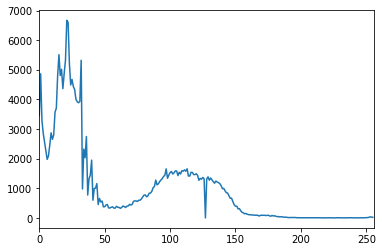

In [14]:
# ヒストグラムの取得
img = np.array( Image.open('./foo.png').convert('L'), 'f' )
hist, bins = np.histogram( img.flatten(), bins=256 )

# 0〜256までplot
plt.plot( hist )
plt.xlim(0, 256)


(0.0, 256.0)

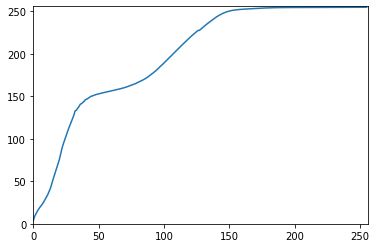

In [15]:

# 累積分布を取る
cdf = hist.cumsum()
# 正規化（0〜255の分布にする）
cdf = 255 * cdf / cdf[-1]

# とりあえずここまででplot
plt.plot( cdf )
plt.xlim( 0, 256 )
plt.ylim( 0, 256 )



(0.0, 256.0)

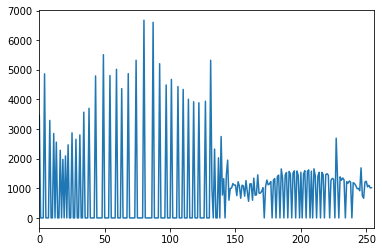

In [16]:
# 線形補間
img2 = np.interp( img.flatten(), bins[:-1], cdf)

# 出来上がった配列のhistogramを見てみる
hist2, bins2 = np.histogram( img2, bins=255 )
plt.plot( hist2 )
plt.xlim(0, 256)


[ 23.35014016  23.35014016  23.35014016 ... 204.36011566 199.70614718
 205.97699087]


True

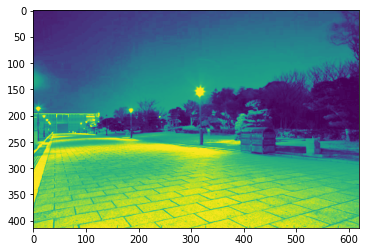

In [21]:
print(img2)
plt.imshow( img2.reshape( img.shape ) )
cv2.imwrite('./image_2_cont.jpg', img2.reshape( img.shape ))